In [1]:
import shutil
shutil.copytree('/content/drive/MyDrive/Personal/Study/Phd/Python/Examples/4.C-LSTM/training_data/Ensemble/', '/content/training_data/')

'/content/training_data/'

dendritic_caps_model
clstm_model




*******************************
7/7 [==============================] - 16s 2s/step - loss: 3.3261 - accuracy: 0.5650
Accuracy: 56.50%
Loss: 332.61%
7/7 [==============================] - 29s 4s/step
Confusion Matrix:
 [[15  0  0  4  1  0  1  0]
 [ 0  9  4  0  0  4  0  3]
 [ 0  4 28  0  2  1  0  4]
 [ 2  3  0  8  0  3  0  2]
 [ 0  2  5  1 14  2  4  2]
 [ 0  1  1  3  0  8  0  2]
 [ 1  0  2  1  2  4 15  0]
 [ 0  3 11  1  0  0  1 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.41      0.45      0.43        20
           2       0.55      0.72      0.62        39
           3       0.44      0.44      0.44        18
           4       0.74      0.47      0.57        30
           5       0.36      0.53      0.43        15
           6       0.71      0.60      0.65        25
           7       0.55      0.50      0.52        32

    accuracy   

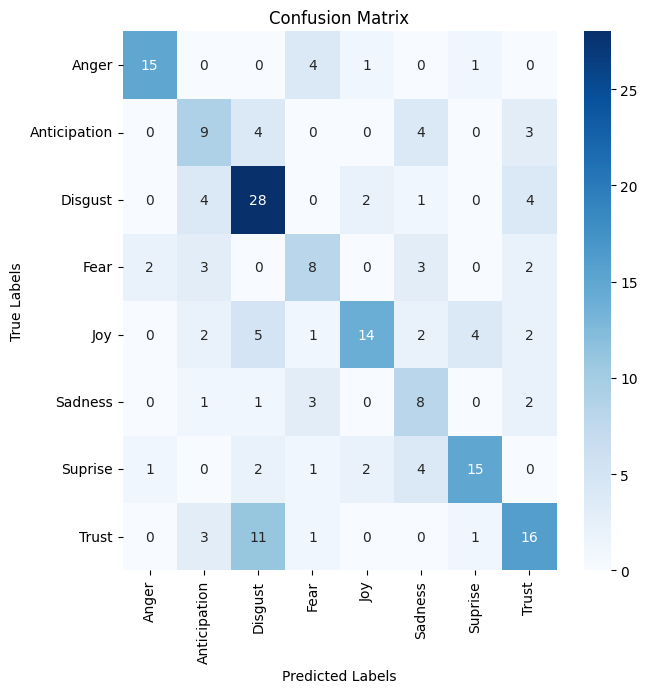

Confusion Matrix:
 [[15  0  0  4  1  0  1  0]
 [ 0  9  4  0  0  4  0  3]
 [ 0  4 28  0  2  1  0  4]
 [ 2  3  0  8  0  3  0  2]
 [ 0  2  5  1 14  2  4  2]
 [ 0  1  1  3  0  8  0  2]
 [ 1  0  2  1  2  4 15  0]
 [ 0  3 11  1  0  0  1 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.41      0.45      0.43        20
           2       0.55      0.72      0.62        39
           3       0.44      0.44      0.44        18
           4       0.74      0.47      0.57        30
           5       0.36      0.53      0.43        15
           6       0.71      0.60      0.65        25
           7       0.55      0.50      0.52        32

    accuracy                           0.56       200
   macro avg       0.58      0.55      0.56       200
weighted avg       0.59      0.56      0.57       200



In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, Flatten, Dense
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
#from keras.utils import np_utils
import joblib
import os
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, ConvLSTM2D, Reshape, Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Concatenate, Input
from tensorflow.keras.models import Model

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
###################################################
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
###################################################
def load_data(load_from_file,name):
    if load_from_file:
        current_dir = os.getcwd()
        subdir = '\\training_data\\'
        save_dir = '/content/training_data'

        x_train = joblib.load(os.path.join(save_dir, 'x_train_'+name+'.joblib'))
        x_test = joblib.load(os.path.join(save_dir, 'x_test_'+name+'.joblib'))
        y_train = joblib.load(os.path.join(save_dir, 'y_train_'+name+'.joblib'))
        y_test = joblib.load(os.path.join(save_dir, 'y_test_'+name+'.joblib'))
        num_labels = joblib.load(os.path.join(save_dir, 'num_labels_'+name+'.joblib'))
        #data = joblib.load(os.path.join(save_dir, 'data_'+name+'.joblib'))
        #labels = joblib.load(os.path.join(save_dir, 'labels_'+name+'.joblib'))
    else:
        #x_train, x_test, y_train, y_test, num_labels = extract_data()
        current_dir = os.getcwd()
        subdir = '\\training_data\\'
        save_dir = current_dir + subdir
        joblib.dump(x_train, os.path.join(save_dir, 'x_train_'+name+'.joblib'))
        joblib.dump(x_test, os.path.join(save_dir, 'x_test_'+name+'.joblib'))
        joblib.dump(y_train, os.path.join(save_dir, 'y_train_'+name+'.joblib'))
        joblib.dump(y_test, os.path.join(save_dir, 'y_test_'+name+'.joblib'))
        joblib.dump(num_labels, os.path.join(save_dir, 'num_labels_'+name+'.joblib'))
        #joblib.dump(data, os.path.join(save_dir, 'data_'+name+'.joblib'))
        #joblib.dump(labels, os.path.join(save_dir, 'labels_'+name+'.joblib'))
    return x_train,x_test,y_train,y_test,num_labels#,data, labels
###################################################
#loadfromfile=False
loadfromfile=True
x_train,x_test,y_train,y_test,num_labels =load_data(load_from_file=loadfromfile,name= 'Ensemble')
from keras import utils
###################################################
###################################################
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
###################################################
###################################################
in_shape = x_train[0].shape
x_train = x_train.reshape(x_train.shape[0], in_shape[1], in_shape[0], 1)
x_test = x_test.reshape(x_test.shape[0], in_shape[1], in_shape[0], 1)
num_timesteps, num_features = x_train.shape[1], x_train.shape[2]
num_classes = 8   #y1_train.shape[1]
###################################################
dendritic_caps_model = tf.keras.models.load_model("/content/drive/MyDrive/Personal/Study/Phd/Python/Examples/4.C-LSTM/model/Dendritic_CapsNets.tf")
print("dendritic_caps_model")
#dendritic_caps_model.summary()
clstm_model = tf.keras.models.load_model("/content/drive/MyDrive/Personal/Study/Phd/Python/Examples/4.C-LSTM/model/conv_lstm_classifier.tf")
print("clstm_model")
#clstm_model.summary()
###################################################
train_images=x_train
train_labels=y_train
test_images=x_test
test_labels=y_test

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#clstm_model.fit(train_images, train_labels, epochs=1)

############################
model = dendritic_caps_model#clstm_model#dendritic_caps_model
############################
print("\n\n\n\n*******************************")

# Get the model predictions
predictions = model.predict(test_images)

# Convert logits to softmax probabilities
predictions = tf.nn.softmax(predictions).numpy()

# Extract the predicted class for each example in the test set
predicted_labels = predictions.argmax(axis=-1)

loss, acc = model.evaluate(x_test, y_test)
print("Accuracy: {:.2f}%".format(acc*100))
print("Loss: {:.2f}%".format(loss*100))


# Create a confusion matrix
#conf_matrix = confusion_matrix(test_labels,predicted_labels )
#classification_rep = classification_report(test_labels,predicted_labels)

y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(y) for y in y_pred]
y_true_classes = [np.argmax(y) for y in y_test]

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

# Plot the confusion matrix
#labels = [str(i) for i in np.unique(np.concatenate((test_labels, predicted_labels)))]
labels = ["Anger", "Anticipation","Disgust","Fear","Joy","Sadness","Suprise","Trust"]


plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

